<a href="https://colab.research.google.com/github/adniaristides/ifood-data-business-analyst-test/blob/master/Case_CRM_iFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [435]:
#importação dos dados
url = "https://raw.githubusercontent.com/adniaristides/ifood-data-business-analyst-test/master/ml_project1_data.csv"

In [436]:
#Organizar em tabela
df = pd.read_csv(url,sep=',')

In [437]:
#Mostrar todas as colunas para as consultas
pd.pandas.set_option('display.max_columns',None)

In [438]:
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsP

In [439]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [440]:
#Apenas a coluna Income tem registros nulos.
print("Qtd registros faltantes {}".format(df[df["Income"].isnull()].shape[0]))
print(df[df["Income"].isnull()])

Qtd registros faltantes 24
         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
3

In [441]:
#Excluindo registros nulos
df = df.dropna()

#Explorando os dados

In [442]:
#verificando dados estatisticos
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

##Gráficos

In [443]:
#Caracteristicas dos clientes
df['Idade'] = df['Year_Birth'].apply(lambda x: int(datetime.today().year) - x)
df['ano_inscricao'] = df['Dt_Customer'].apply(lambda x: str(x)[:4]).astype(int)
qtd_clientes = df['ID'].count()

In [444]:
# Socio econômico

df_social = df.iloc[:,[2,3,4,5,29,30]]

for columns in df_social:
     grafico = px.histogram(df_social,x=columns)
     grafico.show()

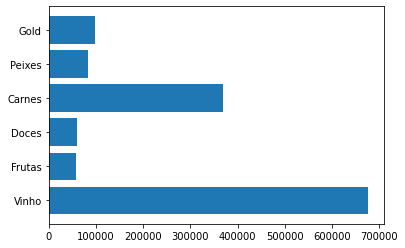

In [445]:
# Categorias

t_wine = df['MntWines'].sum()
t_frut = df['MntFruits'].sum()
t_meat = df['MntMeatProducts'].sum()
t_fish = df['MntFishProducts'].sum()
t_sweet = df['MntSweetProducts'].sum()
t_gold = df['MntGoldProds'].sum()

x_c = ['Vinho','Frutas','Doces','Carnes', 'Peixes','Gold']
y_c = [t_wine,t_frut,t_sweet,t_meat,t_fish,t_gold]

plt.barh(x_c,y_c)
plt.show()

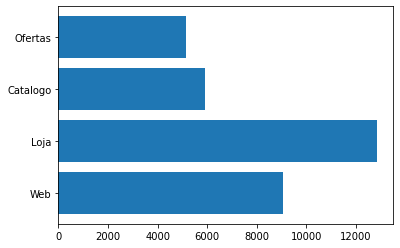

In [446]:
#Canais de Compra

t_web = df['NumWebPurchases'].sum()
t_cat = df['NumCatalogPurchases'].sum()
t_sto = df['NumStorePurchases'].sum()
t_deal = df['NumDealsPurchases'].sum()

x_cc = ['Web','Loja','Catalogo','Ofertas']
y_cc = [t_web,t_sto,t_cat,t_deal]

plt.barh(x_cc,y_cc)
plt.show()

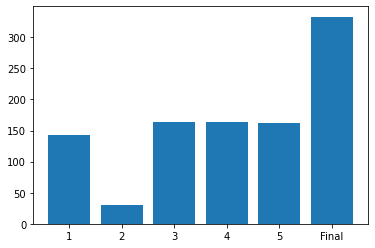

In [447]:
#Campanha

t_cmp1 = df['AcceptedCmp1'].sum()
t_cmp2 = df['AcceptedCmp2'].sum()
t_cmp3 = df['AcceptedCmp3'].sum()
t_cmp4 = df['AcceptedCmp4'].sum()
t_cmp5 = df['AcceptedCmp5'].sum()
t_cmplast = df['Response'].sum()

x_cmp = ['1','2','3','4','5','Final']
y_cmp = [t_cmp1,t_cmp2,t_cmp3,t_cmp4,t_cmp5,t_cmplast]

plt.bar(x_cmp,y_cmp)
plt.show()

Tratando Outliers

In [448]:
#Calculo média e desvio padrão para Idade
mean = np.mean(df.Idade, axis=0).__int__()
sd = np.std(df.Idade, axis=0).__int__()
lim_inf = mean - 3 * sd
lim_sup = mean + 3 * sd

In [449]:
#Listando Valores Inferiores
print("Limite inferior {}".format(lim_inf))
for x in df.Idade:
    if(x < lim_inf): print(df.index[df["Idade"] == x])

Limite inferior 19


In [450]:
#Listando Valores Superiores
print("Limite superior {}".format(lim_sup))
for x in df.Idade:
    if(x > lim_sup): print(df.index[df["Idade"] == x])

Limite superior 85
Int64Index([192], dtype='int64')
Int64Index([239], dtype='int64')
Int64Index([339], dtype='int64')


In [451]:
#excluindo linhas com outliers
df = df.drop(labels=[339,239,192],axis=0) 

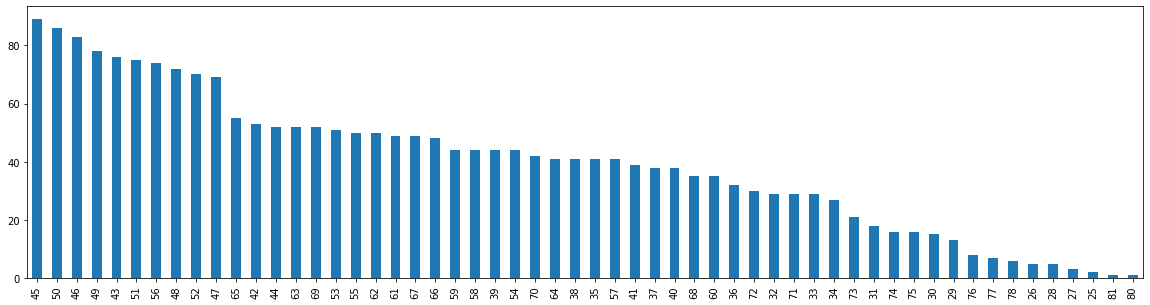

In [452]:
df['Idade'].value_counts().plot(kind='bar',figsize=(20,5))
plt.show()

In [453]:
#Calculo média e desvio padrão para Income
mean = np.mean(df.Income, axis=0).__int__()
sd = np.std(df.Income, axis=0).__int__()
lim_inf_in = mean - 2 * sd
lim_sup_in = mean + 2 * sd

In [454]:
#Listando Valores Inferiores
print("Limite inferior {}".format(lim_inf_in))
for x in df.Income:
    if(x < lim_inf_in): print(df.index[df["Idade"] == x])

Limite inferior 1892
Int64Index([], dtype='int64')


In [455]:
#Listando Valores Superiores
print("Limite superior {}".format(lim_sup_in))
for x in df.Income:
    if(x > lim_sup_in): print(df.index[df["Income"] == x])

Limite superior 102580
Int64Index([164], dtype='int64')
Int64Index([252], dtype='int64')
Int64Index([617], dtype='int64')
Int64Index([646], dtype='int64')
Int64Index([655], dtype='int64')
Int64Index([687], dtype='int64')
Int64Index([1300], dtype='int64')
Int64Index([1653], dtype='int64')
Int64Index([1898], dtype='int64')
Int64Index([2132], dtype='int64')
Int64Index([2233], dtype='int64')


In [456]:
#excluindo linhas com outliers
df = df.drop(labels=[164,252,617,646,655,687,1300,1653,1898,2132,2233],axis=0) 

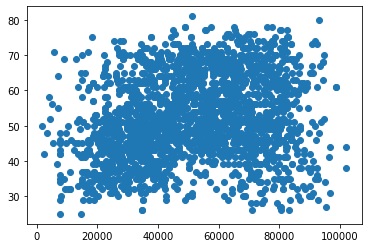

In [457]:
plt.scatter(df.Income,df.Idade)
plt.show()

In [458]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2202.000000  2202.000000    2202.000000  2202.000000  2202.000000   
mean    5584.275658  1968.912352   51546.240690     0.442779     0.507266   
std     3248.208869    11.702159   20624.131931     0.537250     0.544429   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2814.250000  1959.000000   35182.500000     0.000000     0.000000   
50%     5458.500000  1970.000000   51258.500000     0.000000     0.000000   
75%     8417.500000  1977.000000   68146.500000     1.000000     1.000000   
max    11191.000000  1996.000000  102160.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2202.000000  2202.000000  2202.000000      2202.000000   
mean     49.053134   306.044505    26.288828       165.287012   
std      28.922689   337.317781    39.586644       217.820509   
min       0.000000     0.000000     0.000000  

In [459]:
#Tratando outliers estado civil (absurd e yolo)

out1 = 'Absurd'
out2 = 'YOLO'

print(df.index[df["Marital_Status"] == out1])

Int64Index([2093, 2134], dtype='int64')


In [460]:
print(df.index[df["Marital_Status"] == out2])

Int64Index([2177, 2202], dtype='int64')


In [461]:
df = df.drop(labels=[2093,2134,2177,2202],axis=0) 

In [462]:
df.Marital_Status.value_counts()

Married     854
Together    567
Single      469
Divorced    229
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

####A tabela possui muitas colunas que podem ser agrupadas/simplificadas.
####Nos próximos passos trataremos as informações kidhome, teenhome, income, idade, estado civil, canais de compra e campanhas visando a normalização.

In [463]:
#Criando coluna para identificar se cliente possui filhos
df['filhos'] = df['Kidhome'] + df['Teenhome']
df['ha_filhos'] = (df['filhos'] != 0)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Idade,ano_inscricao,filhos,ha_filhos
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,2012,0,False
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2014,2,True
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,2013,0,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,2014,1,True
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2014,1,True


In [464]:
#Verificando dados coluna filhos
df.filhos.value_counts(normalize=True)

1    0.505005
0    0.283439
2    0.188808
3    0.022748
Name: filhos, dtype: float64

In [465]:
#Verificando dados coluna ha_filhos
df.ha_filhos.value_counts(normalize=True)

True     0.716561
False    0.283439
Name: ha_filhos, dtype: float64

In [466]:
#Criando coluna para segmentar os clientes por faixa etária

df['faixa_etaria'] = df['Idade'] 

#definiremos as faixas conforme dados describe para income
# idade_media - 52.087648    
# idade_min - 25.000000 
# idade_25% - 44.000000 
# idade_50% - 51.000000 
# idade_75% - 62.000000   
# idade_max - 81.000000 

#abaixo de 30
# 30-45
# 45-55
# 55-65
#acima de 65

df.loc[df.Idade<30,'faixa_etaria']= 'abaixo de 30'
df.loc[(df.Idade>=30) & (df.Idade<45),'faixa_etaria']= '30-44'
df.loc[(df.Idade>=45) & (df.Idade<55),'faixa_etaria']= '45-54'
df.loc[(df.Idade>=55) & (df.Idade<65),'faixa_etaria']= '55-64'
df.loc[df.Idade>=65,'faixa_etaria']= 'acima de 65'

df[['Idade','faixa_etaria']] 

,Idade,faixa_etaria
0,64,55-64
1,67,acima de 65
2,56,55-64
3,37,30-44
4,40,30-44
...,...,...
2235,54,45-54
2236,75,acima de 65
2237,40,30-44
2238,65,acima de 65


In [467]:
#Verificando dados da coluna faixa_etaria
print(df['faixa_etaria'].value_counts(normalize=True))

45-54           0.322566
30-44           0.258872
55-64           0.217925
acima de 65     0.188353
abaixo de 30    0.012284
Name: faixa_etaria, dtype: float64


In [468]:
#Criando coluna para segmentar os clientes por renda(income)

df['faixa_renda'] = df['Income'] 

#definiremos as faixas conforme dados describe para income
#income_min = 1730.000000 - 18k
#income_25% = 35182.500000 - 18k-35k
#income_50% = 51258.500000 - 35k-51k
#income_75% = 68146.500000 - 51k-69k
#income_max = 102160.000000 - maior que 69 k 
#income_media = 51546.240690 

df.loc[df.Income<18000,'faixa_renda']= 'abaixo de 18k'
df.loc[(df.Income>=18000) & (df.Income<35000),'faixa_renda']= '18k-35k'
df.loc[(df.Income>=35000) & (df.Income<51000),'faixa_renda']= '35k-51k'
df.loc[(df.Income>=51000) & (df.Income<69000),'faixa_renda']= '51k-69k'
df.loc[df.Income>=69000,'faixa_renda']= 'acima de 69k'

df[['Income','faixa_renda']] 

,Income,faixa_renda
0,58138.0,51k-69k
1,46344.0,35k-51k
2,71613.0,acima de 69k
3,26646.0,18k-35k
4,58293.0,51k-69k
...,...,...
2235,61223.0,51k-69k
2236,64014.0,51k-69k
2237,56981.0,51k-69k
2238,69245.0,acima de 69k


In [469]:
#Verificando dados da coluna faixa_renda
print(df['faixa_renda'].value_counts(normalize=True))

51k-69k          0.262511
35k-51k          0.246133
acima de 69k     0.241583
18k-35k          0.208826
abaixo de 18k    0.040946
Name: faixa_renda, dtype: float64


In [470]:
#Criando coluna para seguimentar estado civil por Casais e Solteiros
df['estado_civil'] = df['Marital_Status'] 

# Married - Casal 
# Together - Casal 
# Single - Solteiro 
# Divorced - Solteiro
# Widow - Solteiro
# Alone - Solteiro

# Casal - 1
# Solteiro - 2

df.loc[df.Marital_Status == 'Together','estado_civil']= 1
df.loc[df.Marital_Status == 'Married','estado_civil']= 1
df.loc[df.Marital_Status == 'Single','estado_civil']= 0
df.loc[df.Marital_Status == 'Divorced','estado_civil']= 0
df.loc[df.Marital_Status == 'Widow','estado_civil']= 0
df.loc[df.Marital_Status == 'Alone','estado_civil']= 0

df[['Marital_Status','estado_civil']] 

,Marital_Status,estado_civil
0,Single,0
1,Single,0
2,Together,1
3,Together,1
4,Married,1
...,...,...
2235,Married,1
2236,Together,1
2237,Divorced,0
2238,Together,1


In [471]:
#Verificando dados da coluna estado_civil
print(df['estado_civil'].value_counts(normalize=True))

1    0.646497
0    0.353503
Name: estado_civil, dtype: float64


In [472]:
#Definindo estado_civil como verdadeiro ou falso para calculo das correlações
df['estado_civil'] = (df['estado_civil'] != 0)

In [473]:
#Criando colunas para indicar a aceitação das campanhas
df['qtd_cpm_aceite'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['cpm_aceite'] = (df['qtd_cpm_aceite'] != 0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Idade,ano_inscricao,filhos,ha_filhos,faixa_etaria,faixa_renda,estado_civil,qtd_cpm_aceite,cpm_aceite
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,2012,0,False,55-64,51k-69k,False,1,True
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2014,2,True,acima de 65,35k-51k,False,0,False
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,2013,0,False,55-64,acima de 69k,True,0,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,2014,1,True,30-44,18k-35k,True,0,False
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2014,1,True,30-44,51k-69k,True,0,False


In [474]:
#Verificando dados da coluna qtd_cpm_aceite
print(df['qtd_cpm_aceite'].value_counts(normalize=True))

0    0.727025
1    0.166970
2    0.063239
3    0.022293
4    0.016379
5    0.004095
Name: qtd_cpm_aceite, dtype: float64


In [475]:
#Verificando dados da coluna qtd_cpm_aceite
print(df['cpm_aceite'].value_counts(normalize=True))

False    0.727025
True     0.272975
Name: cpm_aceite, dtype: float64


In [476]:
#Normalizando canais de compra (cliente uriliza ou não o canal)
df['usa_web'] = (df['NumWebPurchases'] != 0)
df['usa_catalogo'] = (df['NumCatalogPurchases'] != 0)
df['usa_loja'] = (df['NumStorePurchases'] != 0)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Idade,ano_inscricao,filhos,ha_filhos,faixa_etaria,faixa_renda,estado_civil,qtd_cpm_aceite,cpm_aceite,usa_web,usa_catalogo,usa_loja
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,2012,0,False,55-64,51k-69k,False,1,True,True,True,True
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2014,2,True,acima de 65,35k-51k,False,0,False,True,True,True
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,2013,0,False,55-64,acima de 69k,True,0,False,True,True,True
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,2014,1,True,30-44,18k-35k,True,0,False,True,False,True
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2014,1,True,30-44,51k-69k,True,0,False,True,True,True


In [477]:
#Verificando dados da coluna usa_web
print(df['usa_web'].value_counts(normalize=True))

True     0.980892
False    0.019108
Name: usa_web, dtype: float64


In [478]:
#Verificando dados da coluna usa_catalogo
print(df['usa_catalogo'].value_counts(normalize=True))

True     0.740673
False    0.259327
Name: usa_catalogo, dtype: float64


In [479]:
#Verificando dados da coluna usa_loja
print(df['usa_loja'].value_counts(normalize=True))

True     0.995905
False    0.004095
Name: usa_loja, dtype: float64


Vamos limpar a base para seguir com os estudos das correlações

In [480]:
#verificando colunas atuais
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Idade', 'ano_inscricao', 'filhos', 'ha_filhos', 'faixa_etaria',
       'faixa_renda', 'estado_civil', 'qtd_cpm_aceite', 'cpm_aceite',
       'usa_web', 'usa_catalogo', 'usa_loja'],
      dtype='object')

In [481]:
#definindo nova base
newdf = df.drop(['ID','Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Dt_Customer','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Z_CostContact', 'Z_Revenue', 'Response','faixa_renda','faixa_etaria'],axis=1)

In [482]:
#verificando dados nova base
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2198 non-null   float64
 1   Recency            2198 non-null   int64  
 2   MntWines           2198 non-null   int64  
 3   MntFruits          2198 non-null   int64  
 4   MntMeatProducts    2198 non-null   int64  
 5   MntFishProducts    2198 non-null   int64  
 6   MntSweetProducts   2198 non-null   int64  
 7   MntGoldProds       2198 non-null   int64  
 8   NumDealsPurchases  2198 non-null   int64  
 9   NumWebVisitsMonth  2198 non-null   int64  
 10  Complain           2198 non-null   int64  
 11  Idade              2198 non-null   int64  
 12  ano_inscricao      2198 non-null   int64  
 13  filhos             2198 non-null   int64  
 14  ha_filhos          2198 non-null   bool   
 15  estado_civil       2198 non-null   bool   
 16  qtd_cpm_aceite     2198 

Vamos analisar as correlações entre as variaveis.

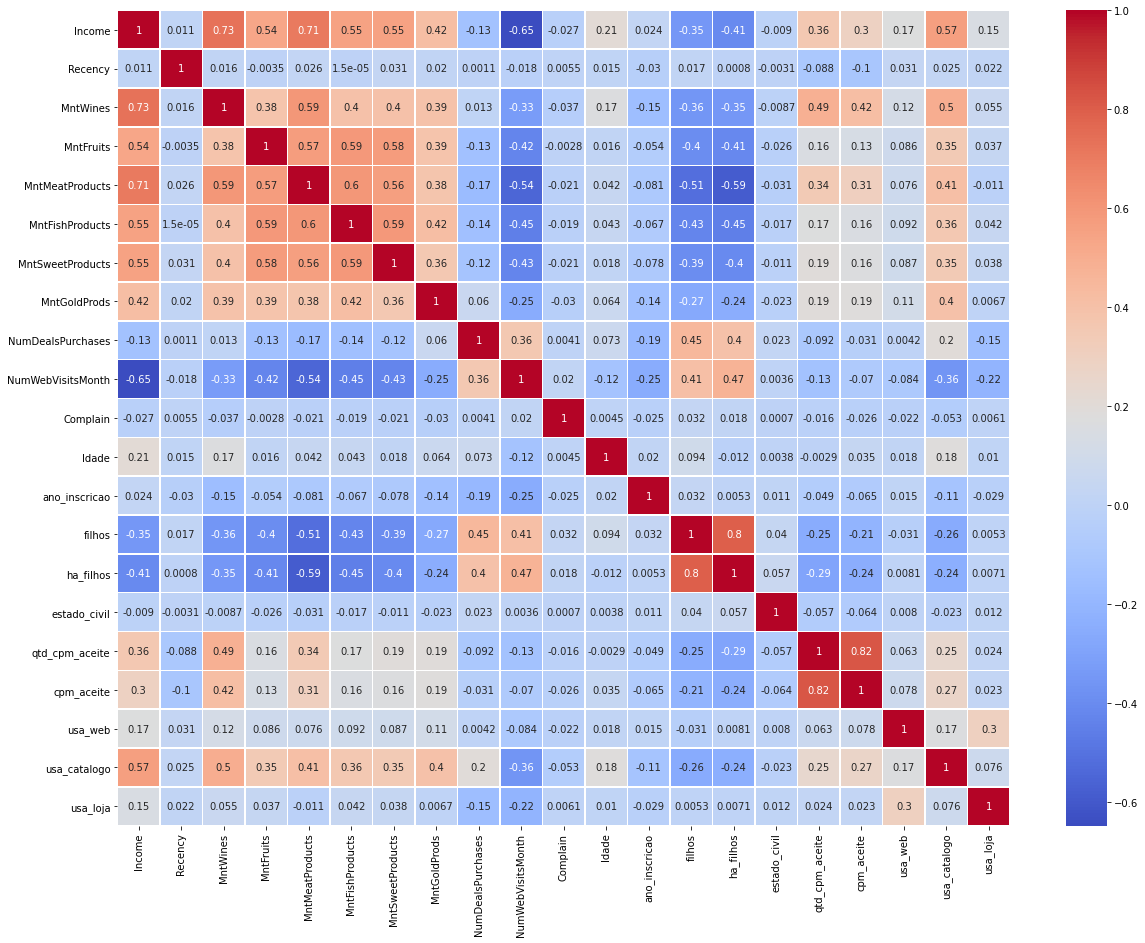

In [483]:
plt.figure(figsize=(20,15))
sns.heatmap(newdf.corr(), annot=True, linewidths=0.5, cmap="coolwarm")
plt.show()

Analisando este grafico vemos algumas correlações interessantes:
* A variavel Income tem correlação positiva bem definida com as categorias Carnes e Vinhos, e correlação negativa bem definida com o numero de visitas no site.
* Dos canais de compra, o catalogo parece ser o mais utilizado sendo inclusive o canal que mostra uma correlação melhor com o aceite de campanha do que o site e a loja.
* Clientes com filhos parecem preferir compras promocionais e não se atem a nenhuma categoria especifica. Também fazem muitas visitas ao site.
* Sobre as visitas ao site, podemos inferir que quanto maior o poder aquisitivo menor é a utilização deste canal.
* Categorias compradas juntas:
  * Vinhos e Carnes
  * Frutas, Carnes, Peixes e Doces 


Vamos verificar o aceite de campanha com mais detalhe.

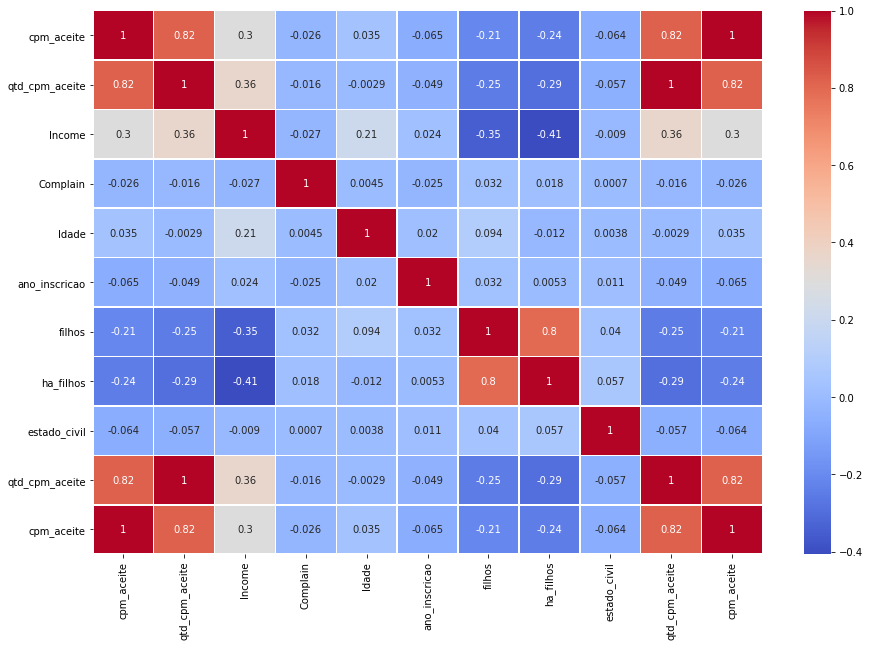

In [484]:
#Avaliando correlação aceite campanha com dados socio economicos
df1 = newdf.iloc[:,[17,16,0,10,11,12,13,14,15,16,17]]
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5, cmap="coolwarm")
plt.show()

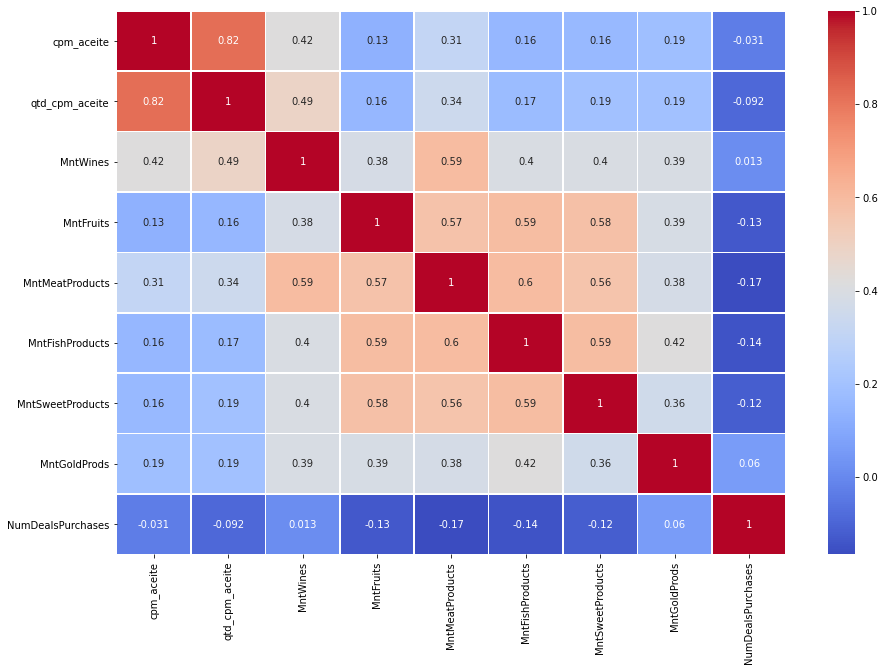

In [485]:
#Avaliando correlação aceite campanha com dados de categorias
df2 = newdf.iloc[:,[17,16,2,3,4,5,6,7,8]]
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, linewidths=0.5, cmap="coolwarm")
plt.show()

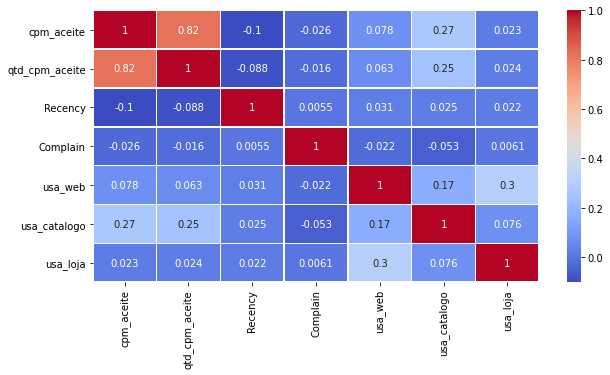

In [486]:
#Avaliando correlação aceite campanha com dados de canais de compra, ultima compra e reclamações
df3 = newdf.iloc[:,[17,16,1,10,18,19,20]]
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True, linewidths=0.5, cmap="coolwarm")
plt.show()

Analisando os graficos vemos que o aceite de campanha tem correlação baixa com todas as variaveis analisadas. 
As variaveos com alguma correlação (>0.20) foram renda (income), categoria vinhos, categoria carnes e catalogo.
Vamos centralizar essas variaveis em um heatmap abaixo.

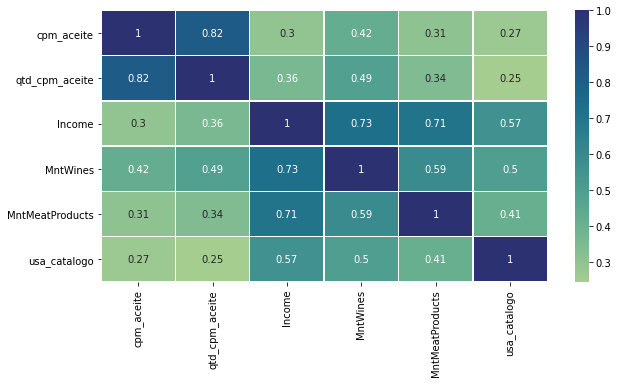

In [487]:
##Avaliando correlação aceite campanha com dados de categorias
df4 = newdf.iloc[:,[17,16,0,2,4,19]]
plt.figure(figsize=(10,5))
sns.heatmap(df4.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



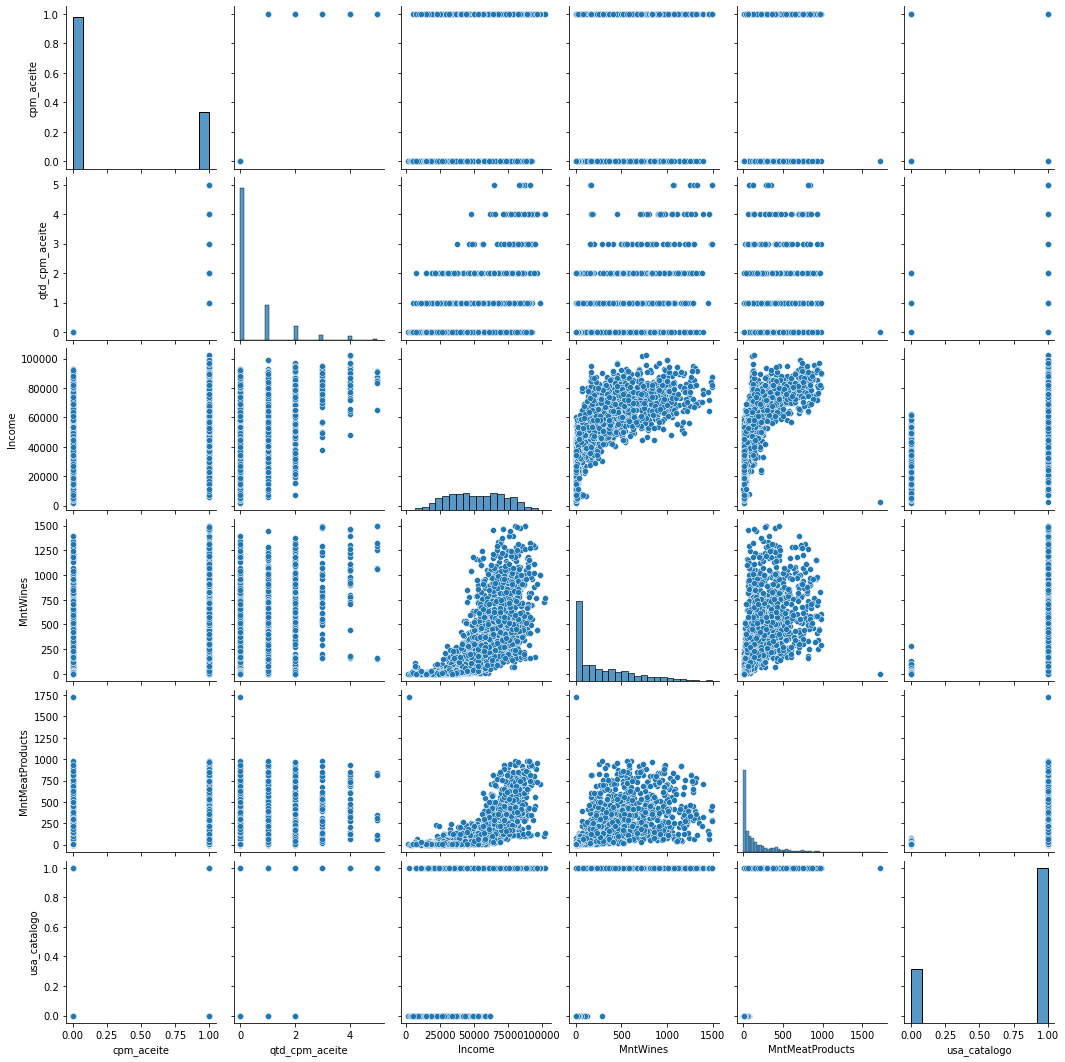

In [488]:
sns.pairplot(df4)

#Seguimentação de clientes

Como Income parece ser uma variavel decisiva para a compra dos produtos, iremos seguimentar os clientes pela renda e pelo total gasto nos ultimos dois anos.

In [490]:
#Criando coluna gasto total
newdf['gasto_total'] = newdf['MntWines'] + newdf['MntFruits'] + newdf['MntMeatProducts'] + newdf['MntFishProducts'] + \
               newdf['MntSweetProducts'] + newdf['MntGoldProds'] + newdf['NumDealsPurchases']

In [491]:
#obtém os dados para a construção do banco de dados apenas com compras de congelados e produtos de limpeza
segmentacao_1 = newdf[['Income' , 'gasto_total']].iloc[: , :].values #transforma os dados em array

In [492]:
kmeans = KMeans(n_clusters=3) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
kmeans.fit(segmentacao_1) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_1) #encontra os grupos

Text(0.5, 1.0, 'Segmentação de clientes por Renda x Gasto total')

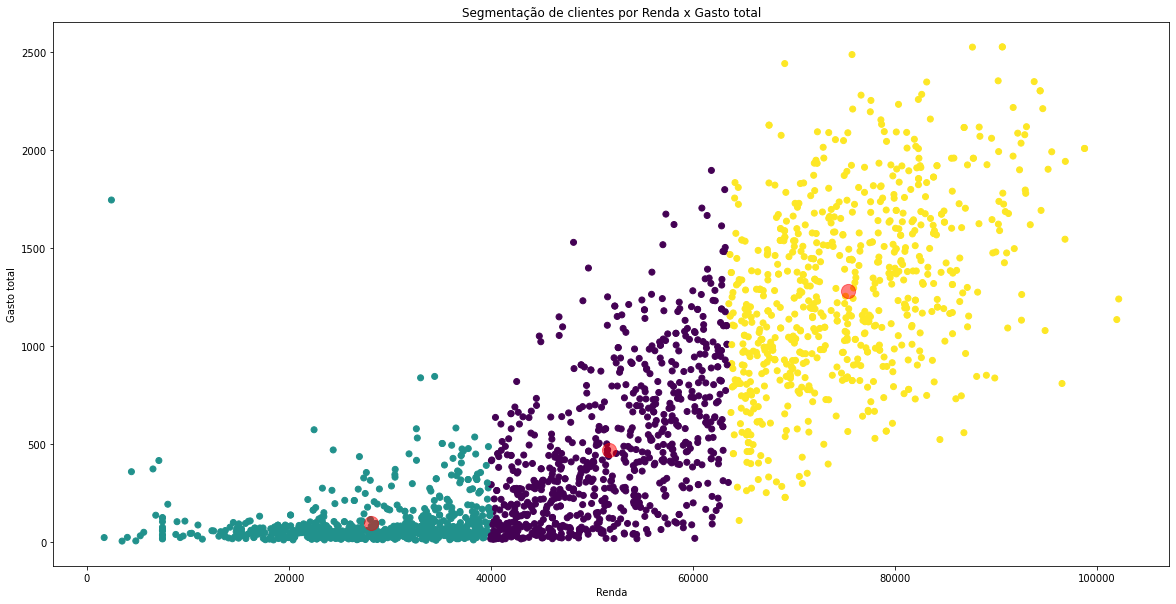

In [493]:
#inicia a construção da figura
plt.figure(figsize = (20 , 10) )

plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Renda")  
plt.ylabel("Gasto total") 
plt.title("Segmentação de clientes por Renda x Gasto total") 

In [494]:
newdf['Seguimentação'] = y_kmeans
newdf.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebVisitsMonth,Complain,Idade,ano_inscricao,filhos,ha_filhos,estado_civil,qtd_cpm_aceite,cpm_aceite,usa_web,usa_catalogo,usa_loja,gasto_total,Seguimentação
0,58138.0,58,635,88,546,172,88,88,3,7,0,64,2012,0,False,False,1,True,True,True,True,1620,0
1,46344.0,38,11,1,6,2,1,6,2,5,0,67,2014,2,True,False,0,False,True,True,True,29,0
2,71613.0,26,426,49,127,111,21,42,1,4,0,56,2013,0,False,True,0,False,True,True,True,777,2
3,26646.0,26,11,4,20,10,3,5,2,6,0,37,2014,1,True,True,0,False,True,False,True,55,1
4,58293.0,94,173,43,118,46,27,15,5,5,0,40,2014,1,True,True,0,False,True,True,True,427,0


In [495]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2198 non-null   float64
 1   Recency            2198 non-null   int64  
 2   MntWines           2198 non-null   int64  
 3   MntFruits          2198 non-null   int64  
 4   MntMeatProducts    2198 non-null   int64  
 5   MntFishProducts    2198 non-null   int64  
 6   MntSweetProducts   2198 non-null   int64  
 7   MntGoldProds       2198 non-null   int64  
 8   NumDealsPurchases  2198 non-null   int64  
 9   NumWebVisitsMonth  2198 non-null   int64  
 10  Complain           2198 non-null   int64  
 11  Idade              2198 non-null   int64  
 12  ano_inscricao      2198 non-null   int64  
 13  filhos             2198 non-null   int64  
 14  ha_filhos          2198 non-null   bool   
 15  estado_civil       2198 non-null   bool   
 16  qtd_cpm_aceite     2198 

#Modelo Preditivo


Vamos utilizar alguns modelos de machine learning para tentar prever se o cliente aceitará ou não a oferta para o gadget.

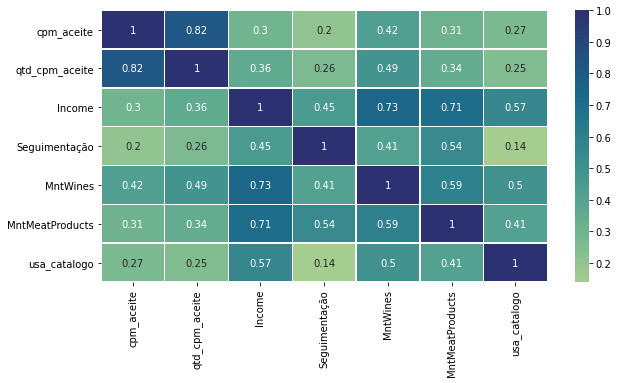

In [496]:
##Avaliando correlação aceite campanha
df4 = newdf.iloc[:,[17,16,0,22,2,4,19]]
plt.figure(figsize=(10,5))
sns.heatmap(df4.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

In [500]:
#Dados para os modelos
x = newdf['Income'].values.reshape(-1,1)
y = newdf['gasto_total'].values.reshape(-1,1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [501]:
#Criar Modelos
linear = LinearRegression()
randomforest = RandomForestRegressor()

In [502]:
# treinar a IA
linear.fit(x_treino,y_treino)
randomforest.fit(x_treino,y_treino)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [503]:
# Verificar qual melhor modelo
teste_linear = linear.predict(x_teste)
teste_randomforest = randomforest.predict(x_teste)

In [504]:
#R² % de quanto o modelo "acerta"
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_randomforest = metrics.r2_score(y_teste,teste_randomforest)
print(r2_linear, r2_randomforest)

0.6892035717764367 0.6780622659078391


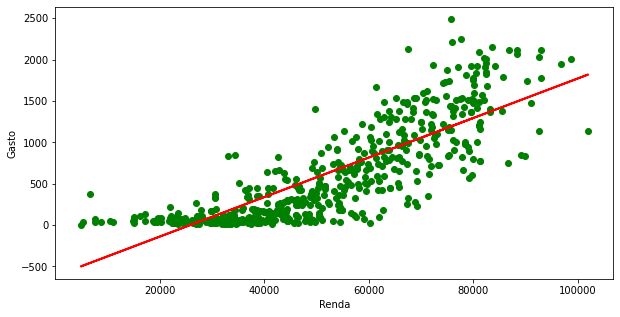

In [519]:
y_pred = linear.predict(x_teste)

plt.figure(figsize=(10,5))
plt.scatter(x_teste, y_teste,  color='green')
plt.plot(x_teste, y_pred, color='red', linewidth=2)
plt.xlabel('Renda')
plt.ylabel('Gasto')
plt.show()